# Data Engineering Project
## Data Analyzers
### Islam Nasr
### Gaser Khaled
### Kariman Hossam
### Marwan Karim 

## Opening available datasets to check how is it organized
Inspecting available datasets to get a view of the columns and rows.

In [161]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [162]:
df_countryData = pd.read_csv('./data/250 Country Data.csv')
df_countryData.head(5)

,Unnamed: 0,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).
1,1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,.7% (2013 est.).,98.7% (2011 est.),1.7% (2013 est.).,16.9% official rate (2013 est.). Note: These a...
3,3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1%.,79%,3.9%.,10.3%.
4,4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,3%.,97% (1980 est.),NaN,NaN


In [163]:
df_countryData.rename(columns={'name': 'Country'}, inplace=True)
df_countryData.columns

Index(['Unnamed: 0', 'Country', 'region', 'subregion', 'population', 'area',
       'gini', 'Real Growth Rating(%)', 'Literacy Rate(%)', 'Inflation(%)',
       'Unemployement(%)'],
      dtype='object')

In [164]:
df_countryData.drop('Unnamed: 0', inplace=True, axis=1)

In [165]:
df_lifeExpectancy = pd.read_csv('./data/Life Expectancy Data.csv')
df_lifeExpectancy.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [166]:
df_happiness2015 = pd.read_csv('./data/Happiness_Dataset/2015.csv')
df_happiness2015.head(5)
df_happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [167]:
df_happiness2015.rename(columns={'Happiness Rank': 'Happiness_Rank',  'Happiness Score': 'Happiness_Score' , 'Standard Error': 'Standard_Error', 'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',  'Health (Life Expectancy)': 'Health_Life_Expectancy', 'Trust (Government Corruption)': 'Trust_Government_Corruption','Dystopia Residual': 'Dystopia_Residual'}, inplace=True)
df_happiness2015.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [168]:
df_happiness2016 = pd.read_csv('./data/Happiness_Dataset/2016.csv')
df_happiness2016.rename(columns={'Happiness Rank': 'Happiness_Rank',  'Happiness Score': 'Happiness_Score' ,'Lower Confidence Interval': 'Lower_Confidence_Interval', 'Upper Confidence Interval': 'Upper_Confidence_Interval', 'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',  'Health (Life Expectancy)': 'Health_Life_Expectancy', 'Trust (Government Corruption)': 'Trust_Government_Corruption','Dystopia Residual': 'Dystopia_Residual'}, inplace=True)
df_happiness2017 = pd.read_csv('./data/Happiness_Dataset/2017.csv')
df_happiness2017.rename(columns={'Happiness.Rank': 'Happiness_Rank',  'Happiness.Score': 'Happiness_Score' , 'Whisker.low': 'Lower_Confidence_Interval', 'Whisker.high': 'Upper_Confidence_Interval', 'Economy..GDP.per.Capita.': 'Economy_GDP_per_Capita',  'Health..Life.Expectancy.': 'Health_Life_Expectancy', 'Trust..Government.Corruption.': 'Trust_Government_Corruption','Dystopia.Residual': 'Dystopia_Residual'}, inplace=True)
df_happiness2018 = pd.read_csv('./data/Happiness_Dataset/2018.csv')
df_happiness2018.rename(columns={'Overall rank': 'Happiness_Rank','Country or region':'Country',  'Score': 'Happiness_Score' , 'GDP per capita': 'Economy_GDP_per_Capita',  'Healthy life expectancy': 'Health_Life_Expectancy','Freedom to make life choices':'Freedom', 'Perceptions of corruption': 'Trust_Government_Corruption','Social support':'Family'}, inplace=True)
df_happiness2019 = pd.read_csv('./data/Happiness_Dataset/2015.csv')
df_happiness2019.rename(columns={'Happiness Rank': 'Happiness_Rank','Happiness Score': 'Happiness_Score' ,'Standard Error':'Standard_Error', 'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',  'Health (Life Expectancy)': 'Health_Life_Expectancy', 'Trust (Government Corruption)': 'Trust_Government_Corruption','Dystopia Residual': 'Dystopia_Residual'}, inplace=True)

In [169]:
df_happiness2015["Year"]=2015
df_happiness2016["Year"]=2016
df_happiness2017["Year"]=2017
df_happiness2018["Year"]=2018
df_happiness2019["Year"]=2019

In [170]:
df_happiness=pd.concat([df_happiness2015, df_happiness2016, df_happiness2017, df_happiness2018, df_happiness2019])

In [171]:
df_happiness.sort_values(by=['Country','Year'], inplace=True)

In [172]:
df_happiness

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual,Year,Lower_Confidence_Interval,Upper_Confidence_Interval
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2015,NaN,NaN
153,Afghanistan,Southern Asia,154,3.360,NaN,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,2016,3.288000,3.432000
140,Afghanistan,NaN,141,3.794,NaN,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,2017,3.714338,3.873661
144,Afghanistan,NaN,145,3.632,NaN,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN,2018,NaN,NaN
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Zimbabwe,Sub-Saharan Africa,115,4.610,0.04290,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910,2015,NaN,NaN
130,Zimbabwe,Sub-Saharan Africa,131,4.193,NaN,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700,2016,4.101000,4.285000
137,Zimbabwe,NaN,138,3.875,NaN,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,1.597970,2017,3.771300,3.978700
143,Zimbabwe,NaN,144,3.692,NaN,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,NaN,2018,NaN,NaN


Change names same of countries with different names in different years to same names

In [173]:
df_happiness['Country']=df_happiness['Country'].replace({'&':'and'},regex=True)
df_happiness['Country']=df_happiness['Country'].replace({'Northern Cyprus':'North Cyprus','Somaliland region':'Somaliland Region','Taiwan Province of China':'Taiwan','Hong Kong S.A.R., China':'Hong Kong'})

In [174]:
df_lifeExpectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

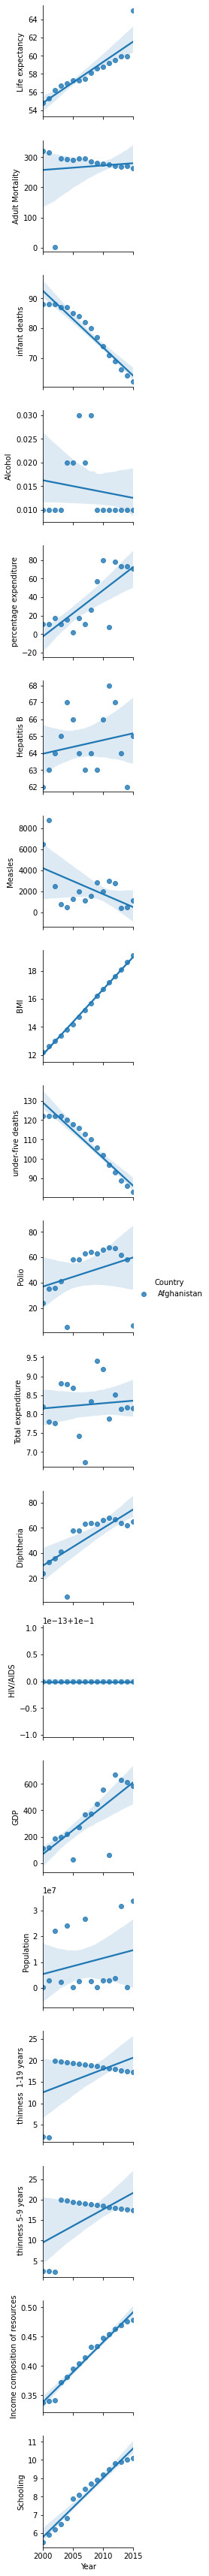

In [176]:
countryAfghanistan = df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Afghanistan']
sns.pairplot(data=countryAfghanistan, hue="Country", x_vars='Year', kind='reg', y_vars=countryAfghanistan.columns[3:])

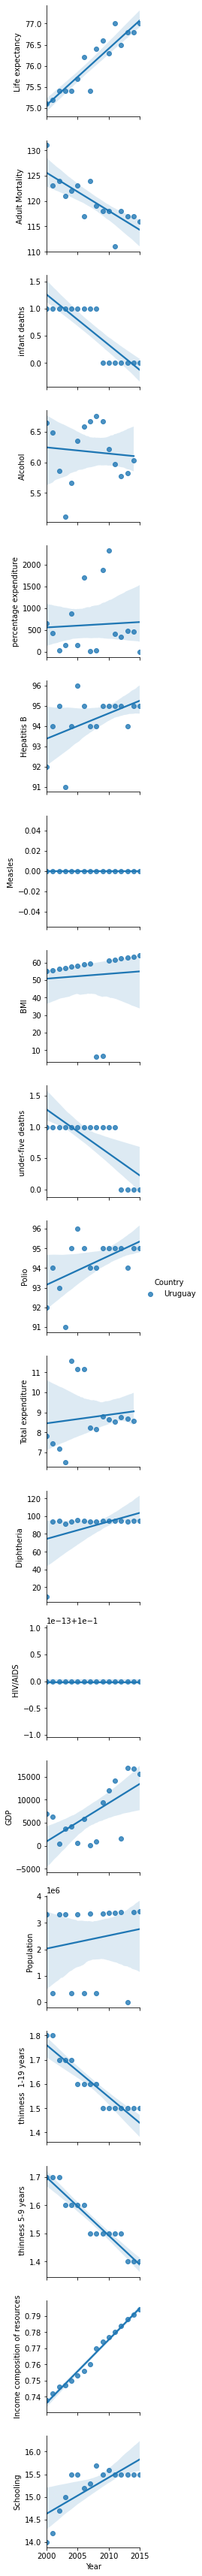

In [133]:
countryUruguay = df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Uruguay']
sns.pairplot(data=countryUruguay, hue="Country", x_vars='Year', kind='reg', y_vars=countryUruguay.columns[3:])

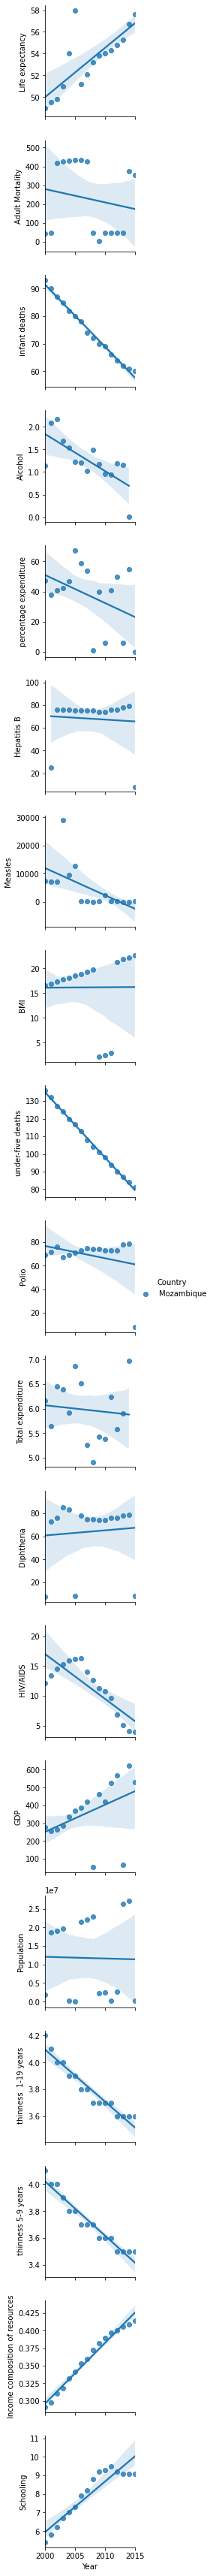

In [134]:
countryMozambique = df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Mozambique']
sns.pairplot(data=countryMozambique, hue="Country", x_vars='Year', kind='reg', y_vars=countryMozambique.columns[3:])

In [180]:
from sklearn.neighbors import LocalOutlierFactor
print(len(df_lifeExpectancy))
df_lifeExpectancyDroppedNa = df_lifeExpectancy.dropna(subset=['Schooling', 'Income composition of resources'])
print(len(df_lifeExpectancyDroppedNa))
X = df_lifeExpectancyDroppedNa[['Schooling', 'Income composition of resources']].values

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)

mask = yhat != -1
X_filtered = X[mask, :]

# summarize the shape of the updated dataset
print(X.shape)
print(X_filtered.shape)

2938
2771
(2771, 2)
(2605, 2)


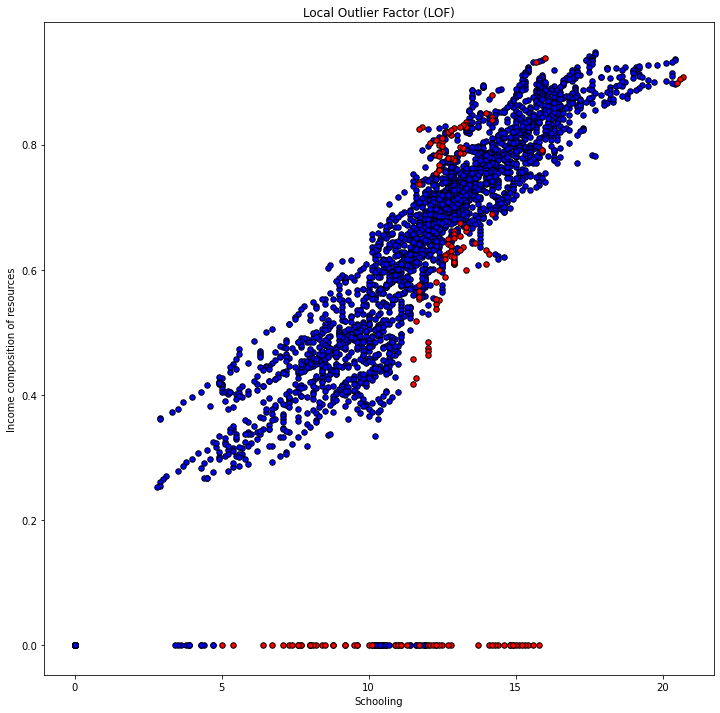

In [182]:
# A visualization of the outliers
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in yhat]
out_mask = [True if l == -1 else False for l in yhat]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Schooling');
plt.ylabel('Income composition of resources');
plt.show()

In [157]:
countriesAvailable_lifeExpectancy=df_lifeExpectancy.groupby(['Country']).groups.keys()
countriesList_lifeExpectancy=[*countriesAvailable_lifeExpectancy]
print(len(countriesAvailable_lifeExpectancy))

133


In [93]:
countriesAvailable_happiness=df_happiness.groupby(['Country']).groups.keys()
countriesList_happiness=[*countriesAvailable_happiness]
print(len(countriesList_happiness))

163


In [94]:
countriesAvailable_250Countries=df_countryData.groupby(['Country']).groups.keys()
countriesList_250Countries=[*countriesAvailable_250Countries]
print(len(countriesList_250Countries))

250


In [95]:
print("In happiness not lifeExpectancy")
print(set(countriesList_happiness).difference(countriesList_lifeExpectancy))
print("In lifeExpectancy not happiness")
print(set(countriesList_lifeExpectancy).difference(countriesList_happiness))

In happiness not lifeExpectancy
{'South Korea', 'United States', 'Palestinian Territories', 'Iran', 'Tanzania', 'United Kingdom', 'Bolivia', 'Moldova', 'Congo (Brazzaville)', 'Russia', 'Laos', 'Taiwan', 'Macedonia', 'Ivory Coast', 'Vietnam', 'Congo (Kinshasa)', 'Syria', 'Venezuela', 'Puerto Rico', 'Czech Republic', 'Hong Kong', 'Somaliland Region', 'North Cyprus', 'Kosovo'}
In lifeExpectancy not happiness
{'United States of America', 'Brunei Darussalam', 'Grenada', 'Republic of Moldova', 'Papua New Guinea', 'Antigua and Barbuda', 'Vanuatu', 'Viet Nam', 'Eritrea', 'Cook Islands', 'Saint Kitts and Nevis', 'Equatorial Guinea', 'Republic of Korea', 'Dominica', 'United Kingdom of Great Britain and Northern Ireland', "Côte d'Ivoire", 'Marshall Islands', 'Russian Federation', 'Samoa', 'Venezuela (Bolivarian Republic of)', 'Cuba', 'Timor-Leste', 'Nauru', 'San Marino', 'Bahamas', 'Barbados', 'Gambia', 'Saint Lucia', 'Seychelles', 'Guyana', 'Iran (Islamic Republic of)', 'Sao Tome and Principe', 

hnfkes north(northern) cyprus 3lashan mesh mwgooda fl lifeExpectancy &
we will leave Palestine lel 2saf & we will not work with anything related to hongKong-taiwan because they bring corona & PuertoRico 

In [96]:
df_lifeExpectancy['Country'] = df_lifeExpectancy['Country'].replace({'Iran (Islamic Republic of)':'Iran', 'Czechia':'Czech Republic','Democratic Republic of the Congo':'Congo (Kinshasa)','Congo':'Congo (Brazzaville)','United Republic of Tanzania':'Tanzania','Russian Federation':'Russia','United States of America':'United States','Venezuela (Bolivarian Republic of)':'Venezuela',"Côte d'Ivoire":'Ivory Coast','Viet Nam':'Vietnam','Republic of Korea':'South Korea','Syrian Arab Republic':'Syria',"Lao People's Democratic Republic":'Laos','Republic of Moldova':'Moldova','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Bolivia (Plurinational State of)':'Bolivia','The former Yugoslav republic of Macedonia':'Macedonia','Czechia':'Czech Republic'})

In [98]:
countriesAvailableCleaned_lifeExpectancy = df_lifeExpectancy.groupby(['Country']).groups.keys()
countriesListCleaned_lifeExpectancy = set([*countriesAvailableCleaned_lifeExpectancy]) & set(countriesList_happiness)
print(len(countriesListCleaned_lifeExpectancy))
print(len(countriesList_happiness))
countriesListCleaned_lifeExpectancy

156
163


{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Le

In [99]:
print("Countries to be dropped from happiness")
print(set(countriesList_happiness).difference(countriesListCleaned_lifeExpectancy))


Countries to be dropped from happiness
{'Kosovo', 'Puerto Rico', 'Hong Kong', 'Somaliland Region', 'North Cyprus', 'Palestinian Territories', 'Taiwan'}


In [100]:
print("In lifeExpectancy Cleaned not 250 countries")
print(set(countriesListCleaned_lifeExpectancy).difference(countriesList_250Countries))
print("In 250 countries not lifeExpectancy Cleaned")
print(set(countriesList_250Countries).difference(countriesListCleaned_lifeExpectancy))


In lifeExpectancy Cleaned not 250 countries
{'South Korea', 'United States', 'Iran', 'Tanzania', 'United Kingdom', 'Bolivia', 'Moldova', 'Congo (Brazzaville)', 'Russia', 'Laos', 'Macedonia', 'Ivory Coast', 'Vietnam', 'Congo (Kinshasa)', 'Syria', 'Venezuela'}
In 250 countries not lifeExpectancy Cleaned
{'Bouvet Island', 'Brunei Darussalam', 'Heard Island and McDonald Islands', 'Gibraltar', "Korea (Democratic People's Republic of)", 'Saint Barthélemy', 'Equatorial Guinea', 'Saint Martin (French part)', 'American Samoa', 'Macedonia (the former Yugoslav Republic of)', 'Cocos (Keeling) Islands', 'Palestine, State of', 'Venezuela (Bolivarian Republic of)', 'Cuba', 'Nauru', 'Anguilla', 'Virgin Islands (U.S.)', 'New Caledonia', 'Pitcairn', 'Falkland Islands (Malvinas)', 'Barbados', 'Republic of Kosovo', 'Andorra', 'Cayman Islands', 'Virgin Islands (British)', 'Korea (Republic of)', 'Antarctica', 'Palau', 'Åland Islands', 'Congo', 'Liechtenstein', 'Fiji', 'Saint Helena, Ascension and Tristan da

In [101]:
df_countryData['Country'] = df_countryData['Country'].replace({'Iran (Islamic Republic of)':'Iran','Tanzania, United Republic of':'Tanzania','Congo':'Congo (Brazzaville)','Congo (Democratic Republic of the)':'Congo (Kinshasa)','Russian Federation':'Russia','United States of America':'United States','Venezuela (Bolivarian Republic of)':'Venezuela',"Côte d'Ivoire":'Ivory Coast','Viet Nam':'Vietnam','Korea (Republic of)':'South Korea','Syrian Arab Republic':'Syria',"Lao People's Democratic Republic":'Laos', 'Moldova (Republic of)':'Moldova','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Bolivia (Plurinational State of)':'Bolivia','Macedonia (the former Yugoslav Republic of)':'Macedonia'})

In [103]:
countriesAvailableCleaned_250Countries=df_countryData.groupby(['Country']).groups.keys()
countriesListCleaned_250Countries=[*countriesAvailableCleaned_250Countries]
countriesListCleaned_IntersectionThree=set(countriesListCleaned_lifeExpectancy)&set(countriesListCleaned_250Countries)
print(len(countriesListCleaned_IntersectionThree))
#countriesListCleaned_IntersectionThree

156


In [104]:
df_integrated = pd.merge(pd.merge(df_countryData,df_happiness,on='Country', how='inner'), df_lifeExpectancy,on='Country', how='inner')

In [105]:
list = []
x = [*df_lifeExpectancy.groupby(['Year']).groups.keys()]
x

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [106]:
model = LinearRegression()
years = np.flip(np.array([*df_lifeExpectancy.groupby(['Year']).groups.keys()]).reshape(-1, 1))
allCountries = [*df_integrated.groupby(['Country']).groups.keys()]
years_predict = np.array([2016, 2017, 2018, 2019]).reshape(-1, 1)
for country in allCountries:
    for columnName, columnData in df_lifeExpectancy.iteritems():
        if(columnName == 'Country' or columnName == 'Year' or columnName == 'Status'):
            continue
        x_train = np.array(df_lifeExpectancy[df_lifeExpectancy['Country'] == country][columnName]).reshape(-1, 1)
        model.fit(years, x_train)
        x_predict = model.predict(years_predict)
        print(x_predict)

[[62.02      ]
 [62.47014706]
 [62.92029412]
 [63.37044118]]
[[281.775     ]
 [283.27058824]
 [284.76617647]
 [286.26176471]]
[[62.05      ]
 [60.14411765]
 [58.23823529]
 [56.33235294]]
[[0.01225]
 [0.012  ]
 [0.01175]
 [0.0115 ]]
[[77.74084862]
 [82.77387668]
 [87.80690474]
 [92.83993281]]
[[65.25      ]
 [65.33088235]
 [65.41176471]
 [65.49264706]]
[[ 255.625     ]
 [   7.78676471]
 [-240.05147059]
 [-487.88970588]]
[[19.4775    ]
 [19.94323529]
 [20.40897059]
 [20.87470588]]
[[83.175     ]
 [80.30588235]
 [77.43676471]
 [74.56764706]]
[[61.45      ]
 [62.98823529]
 [64.52647059]
 [66.06470588]]
[[8.36925   ]
 [8.38298529]
 [8.39672059]
 [8.41045588]]
[[77.7       ]
 [80.68676471]
 [83.67352941]
 [86.66029412]]
[[0.1]
 [0.1]
 [0.1]
 [0.1]]
[[648.53423281]
 [684.83056309]
 [721.12689336]
 [757.42322364]]
[[15233957.02499986]
 [15852980.22647047]
 [16472003.42794108]
 [17091026.6294117 ]]
[[21.1775    ]
 [21.71823529]
 [22.25897059]
 [22.79970588]]
[[22.5025    ]
 [23.31676471]
 [24.1

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').